# Spotify Playlist Analysis with Song Recommendation

Author: Pharoah Evelyn

![Spotify Logo](./images/Spotify_Logo.jpeg)

In [1]:
# Standard Packages
import glob
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklearn Modules
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error,\
        mean_squared_error, ndcg_score, plot_roc_curve, precision_score, recall_score,\
        roc_curve, roc_auc_score, plot_confusion_matrix

from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler
from sklearn.svm import SVC

# Progress bar
from tqdm import tqdm

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

First, let us import the data captured from our Collection using the Spotify API

In [2]:
# My playlist

my_playlist = pd.read_csv('data/my_playlist.csv')

Next, we can import all other playlists into a separated dataframe!

In [3]:
# Get CSV files list from a folder
path = './data'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes. 
# However, we must not include our target playlist as we need it for its own analysis
df_list = (pd.read_csv(file) for file in csv_files if file != 'my_playlist.csv')

# Concatenate all DataFrames
recommended_songs = pd.concat(df_list, ignore_index=True)

#### This dataframe contains all the songs in my playlist of choice:
![My_Playlist](./images/My_Playlist.png)

In [4]:
my_playlist.tail()

,name,album,artist,release_date,length,popularity,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo,time_signature
199,Oh How Lovely (feat. Tomppabeats),For Her,wüsh,2016-11-04,80308,43,0.248,0.793,0.407,3,0.412,0.000,0.537,-10.517,0.2100,1,77.729,4
200,Space Cowboy,Ipanema,Saib,2015-04-28,152625,46,0.474,0.854,0.722,0,0.689,0.816,0.153,-15.050,0.1700,1,97.993,4
201,m i s t,ep seeds,eevee,2017-03-16,118182,56,0.354,0.624,0.395,1,0.229,0.470,0.116,-15.698,0.0460,0,130.069,4
202,Football Head,Pleasure Palette,Flamingosis,2016-06-10,224916,4,0.660,0.662,0.584,1,0.212,0.570,0.609,-14.638,0.0523,1,89.996,4
203,Caliber,Caliber,yeyts.,2020-09-14,130588,46,0.575,0.754,0.533,2,0.281,0.752,0.124,-9.757,0.1120,1,85.191,4


In [5]:
recommended_songs.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo,time_signature
0,Awake (with Mahalia),Awake,Chiiild,2021-04-02,228626,0,0.315,0.504,0.665,5,0.579,0.054200,0.1100,-7.418,0.0423,0,83.973,4
1,Bound (with Blood Orange),Bound (with Blood Orange),Wet,2021-10-20,220332,48,0.172,0.629,0.270,10,0.515,0.133000,0.1440,-10.128,0.0785,0,191.706,4
2,dirty dancer,dirty dancer,Orion Sun,2022-02-08,169720,56,0.376,0.702,0.515,7,0.525,0.066700,0.1190,-5.028,0.0313,0,113.856,4
3,lived to love,lived to love,808vic,2021-09-22,255517,47,0.835,0.714,0.562,9,0.798,0.013300,0.0969,-10.997,0.0532,0,115.972,4
4,Intense,Blue Man,Cero Ismael,2021-02-18,141052,38,0.657,0.957,0.338,5,0.233,0.000036,0.1440,-11.533,0.1110,1,113.943,4


This dataframe encapsulates songs from the below libraries:

#### Playlists based on my recent listening History
![Based_on_Recent_Listening](./images/Based_on_Recent_Listening.png)
<br>
#### Playlists curated based on what I like
![More_of_What_You_Like](./images/More_of_What_You_Like.png)

In [6]:
# Defining a function to create distribution plots of each relevant column

def vizualize_data(data):
    
    #Visualisation of Variability for each column in the dataframe

    fig,ax = plt.subplots(2,7,figsize=(20,10))

    sns.distplot(data['length'],bins=35,ax=ax[0,0])
    sns.distplot(data['popularity'],bins=35,ax=ax[0,1])
    sns.distplot(data['acousticness'],bins=35,ax=ax[0,2])
    sns.distplot(data['danceability'],bins=35,ax=ax[0,3])
    sns.distplot(data['valence'],bins=35,ax=ax[0,4])
    sns.distplot(data['key'],bins=35,ax=ax[0,5])
    sns.distplot(data['energy'],bins=35,ax=ax[0,6])
    sns.distplot(data['instrumentalness'],bins=35,ax=ax[1,0])
    sns.distplot(data['liveness'],bins=35,ax=ax[1,1])
    sns.distplot(data['loudness'],bins=35,ax=ax[1,2])
    sns.distplot(data['speechiness'],bins=35,ax=ax[1,3])
    sns.distplot(data['mode'],bins=35,ax=ax[1,4])
    sns.distplot(data['tempo'],bins=35,ax=ax[1,5])
    sns.distplot(data['time_signature'],bins=35,ax=ax[1,6])

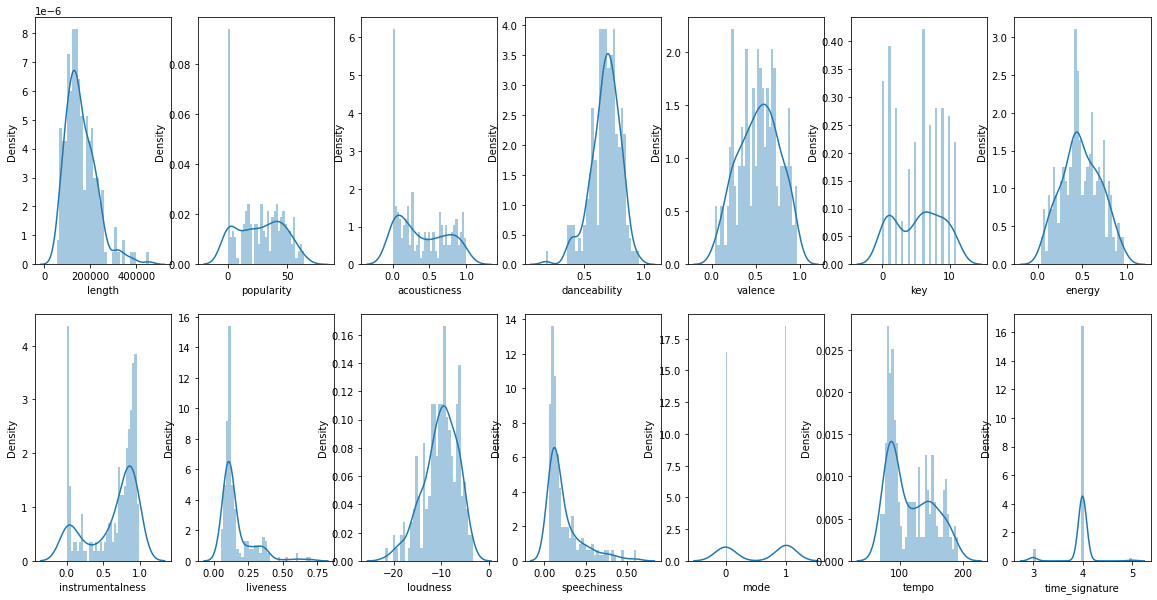

In [7]:
vizualize_data(my_playlist)

<AxesSubplot:>

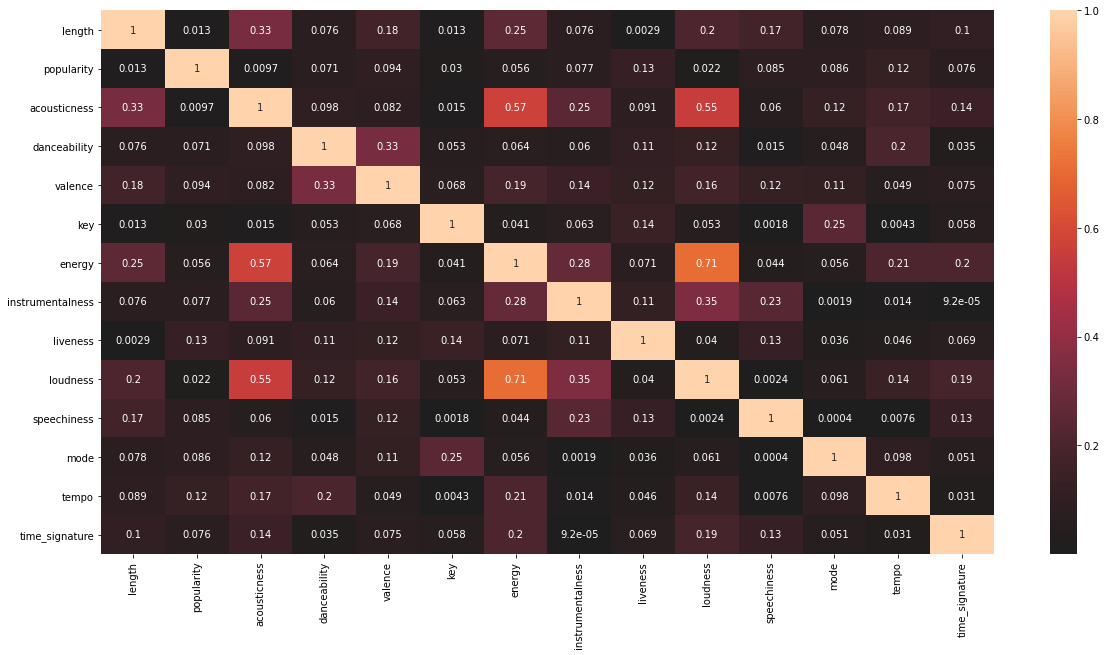

In [8]:
# My playlist
plt.figure(figsize=(20,10))
corr = my_playlist.corr().abs()
sns.heatmap(corr, center=0, annot=True)

#### Interpretation:
* This heatmap shows me that `energy`, `instrumentalness`, `acousticness`, & `loudness` have the most impact when it comes to the songs I have in my playlist
* Other key pairings I am noticing are `valence` & `danceability`, 
* Song `length`, `speechiness`, `popularity` & `time signature` appear to be the least relevant when it comes to the impact of features in this playlist
    * With that said, I usually don't add songs with vocals (or verses) to this playlist. So I will keep speechiness as a key marker
* `energy` and `loudness` in particular have the highest multicollinearity seen on this chart. This makes sense to me, as a song with high energy tends to have an increasing rhythmic complexity, whether melodically or in the background accompaniment with various instruments (as reflected in this chart as well

#### Investigating the statistics of the relevant columns

In [9]:
my_playlist[['acousticness', 'danceability', 'valence', 'key', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'mode', 'tempo']].describe()

,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.397338,0.679824,0.535355,5.362745,0.486715,0.619866,0.162888,-10.162534,0.117995,0.529412,116.384020
std,0.329015,0.120787,0.228999,3.551976,0.216834,0.341169,0.114808,3.606242,0.106193,0.500362,34.629592
min,0.000157,0.180000,0.038300,0.000000,0.032400,0.000000,0.049700,-21.776000,0.027800,0.000000,68.997000
25%,0.082100,0.623750,0.358750,2.000000,0.338000,0.352750,0.101000,-12.047250,0.048850,0.000000,86.199500
50%,0.314500,0.689500,0.545000,6.000000,0.461000,0.773500,0.116000,-9.672000,0.072750,1.000000,104.524000
75%,0.696000,0.755250,0.705000,8.000000,0.648250,0.891000,0.162750,-7.383500,0.147500,1.000000,146.038500
max,0.994000,0.964000,0.969000,11.000000,0.973000,0.981000,0.706000,-3.227000,0.556000,1.000000,192.110000


#### Interpretation
We can use the above information to capture common datapoints throughout the values found from my playlist.

For example, most songs in my playlist have an energy level between 0.34 to 0.65, with exceptions below and above
<br> 
Furthermore, most songs in my playlist are not very speechy, between 0.05 & 0.15, with exceptions below and above

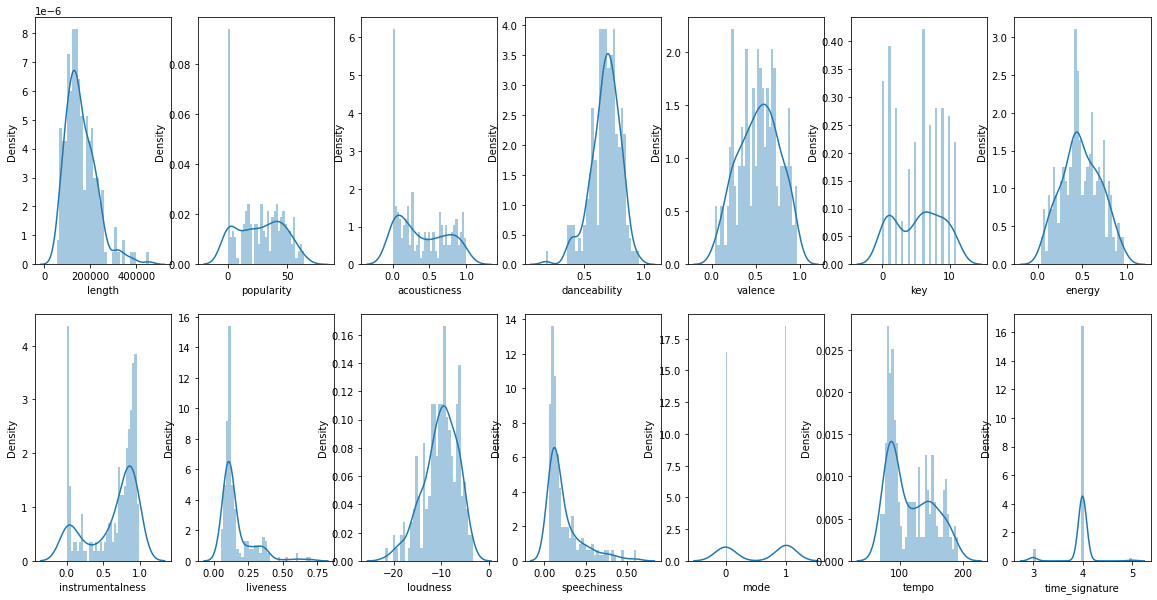

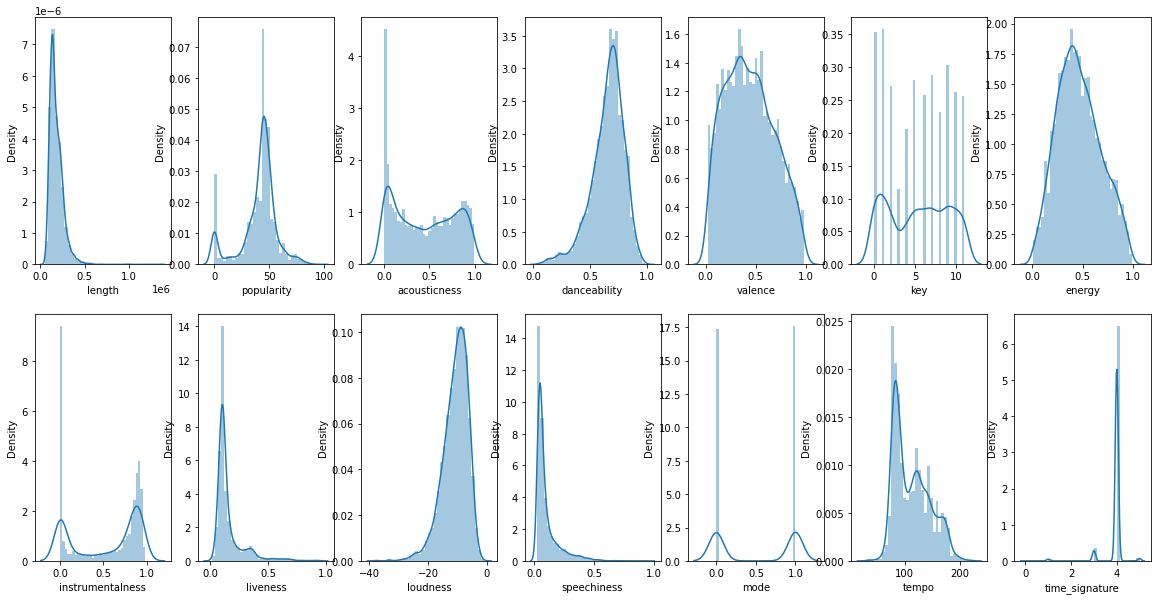

In [10]:
# Comparison of the distributions between my playlist, and all songs combined

vizualize_data(my_playlist) # First 2 rows
vizualize_data(recommended_songs) # Second 2 rows

#### Interpretation:
* Upon direct comparison of each feature in both datasets, we can see that they appear similar with their distributions, albeit with slight variations.
* There is a higher distribution with songs of lower valence in the recommended songs dataset compared to my playlist. This suggests that I tend to like happier-sounding songs.
* Popularity in my playlist also seems to be more varied, whereas a noticeable selection of songs in the second dataset are popular. In contrast, songs on my playlist don't necessarily cater to popular music.

### Combining the data 
Here, I am creating the identifier for all songs for the total data collected

Songs in my playlist will be marked 1, and others will be marked 0

In [11]:
my_playlist['target'] = '' # Creating an empty column
my_playlist['target'].replace('', 1, inplace=True) # Filling the new column with a number value

recommended_songs['target'] = ''
recommended_songs['target'].replace('', 0, inplace=True)

df_ = [my_playlist, recommended_songs] # All captured playlist songs, with their target association

df = pd.concat(df_)
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,valence,key,energy,instrumentalness,liveness,loudness,speechiness,mode,tempo,time_signature,target
0,Getting There,Until The Quiet Comes,Flying Lotus,2012-10-01,109353,39,0.1490,0.180,0.100,1,0.719,0.000370,0.1310,-5.789,0.0993,1,163.801,4,1
1,Massage Situation,Reset EP,Flying Lotus,2007-10-01,167173,45,0.0108,0.603,0.403,3,0.606,0.001570,0.1080,-5.060,0.0688,0,93.060,4,1
2,Do The Astral Plane,Cosmogramma,Flying Lotus,2010-05-03,237920,44,0.0505,0.722,0.275,8,0.828,0.000000,0.1140,-3.227,0.1900,0,117.693,4,1
3,Camel,Los Angeles,Flying Lotus,2008-07-09,142893,34,0.0132,0.699,0.584,0,0.926,0.200000,0.3110,-6.142,0.2850,1,84.863,4,1
4,Putty Boy Strut,Until The Quiet Comes,Flying Lotus,2012-10-01,173687,32,0.1030,0.723,0.711,1,0.432,0.218000,0.0883,-7.891,0.4180,1,163.973,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,Pomegranate,"Lyrics to GO, Vol. 2",Kota the Friend,2021-01-18,109638,58,0.1360,0.637,0.373,2,0.489,0.000000,0.0954,-9.157,0.4440,1,79.175,4,0
4310,Raindrops (feat. Flo Milli),Raindrops (feat. Flo Milli),GoldLink,2021-06-16,155573,44,0.5060,0.868,0.559,9,0.563,0.000025,0.1500,-7.448,0.1720,0,139.971,4,0
4311,Why You in LA,Why You in LA,Keys Open Doors,2020-03-15,188839,44,0.0973,0.939,0.425,11,0.322,0.000092,0.0883,-9.463,0.3040,1,114.317,4,0
4312,Kimbo Slice,Kimbo Slice,Rexx Life Raj,2021-07-16,193109,55,0.1810,0.806,0.513,11,0.713,0.000000,0.0601,-6.792,0.1570,1,121.941,4,0


In [12]:
df.columns

Index(['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'valence', 'key', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'mode',
       'tempo', 'time_signature', 'target'],
      dtype='object')

In [13]:
df.shape

(4518, 19)

In [14]:
df.drop_duplicates(subset=['name', 'album', 'artist', 'release_date', 'length', 'popularity',
       'acousticness', 'danceability', 'valence', 'key', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'mode',
       'tempo', 'time_signature'], keep='first', inplace=True)
df.shape

(3969, 19)

# Modeling
#### Feature Selection

In [15]:
feature_names = ['length', 'popularity', 'acousticness', 'danceability', 
                 'valence', 'key', 'energy', 'instrumentalness', 'liveness', 
                 'loudness', 'speechiness', 'mode','tempo', 'time_signature']

X, y = df[feature_names], df['target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size = 0.15, 
                                random_state = 42)

In [17]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

#### Addressing Class Weights

In [18]:
# Discovering the total number of entries in are target training data
len(y_train)

3373

In [19]:
# Captures the ammount of occurences of each class in the training set

count = np.bincount(y_train)
print(count[0]) # Majority class
print(count[1]) # Minority class

3213
160


In [20]:
w0 = count[1]/len(y_train) # Assigning minority percentage
w1 = count[0]/len(y_train) # Assigning majority percentage

print(w0) # Adjusted weight for the minority class
print(w1) # Adjusted weight for the majority class

0.04743551734361103
0.9525644826563889


### Defining functions fo rmodel evaluation

In [21]:
metrics_df = []
def get_classification_report(y_test, y_pred):
    # This function returns a clean classification report in a pandas dataframe format
    from sklearn import metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    
    ##### reindex or change the order of rows
    df_classification_report.reindex(['0', '1', 'accuracy', 'weighted avg', 'macro avg'])
    
    #### Returning Capitalized column names
    df_classification_report.columns = df_classification_report.columns.str.capitalize()

    # Creates a 3-D dataframe
    metrics_df.append(df_classification_report.iloc[1:2, :])
    return df_classification_report


def model_results(model, X_test, y_test):
    # This function returns various metrics for our models that we run

    preds = model.predict(X_test)
    
    # A visual representation of a confusion Matrix
    plot_confusion_matrix(model, X_test, y_test);    
    plt.grid(False)
    
    # Prints the MAE & RMSE of a model
    print('Mean Absolute Error:', mean_absolute_error(y_test, preds)) 
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))

## Logistic Regression

Mean Absolute Error: 0.2634228187919463
Root Mean Squared Error: 0.5132473271162221


,Precision,Recall,F1-score,Support
0,0.962529,0.744565,0.839632,552.000000
1,0.165680,0.636364,0.262911,44.000000
accuracy,0.736577,0.736577,0.736577,0.736577
macro avg,0.564105,0.690464,0.551272,596.000000
weighted avg,0.903702,0.736577,0.797056,596.000000


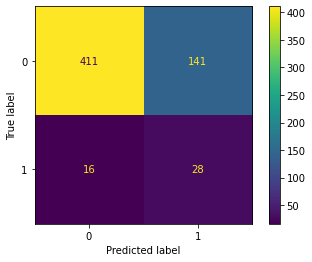

In [22]:
lr = LogisticRegression(class_weight={0: w0, 1: w1})
lr.fit(X_train_sc, y_train);

# Displays results of the model
model_results(lr, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, lr.predict(X_test_sc))

## SVC

Mean Absolute Error: 0.2063758389261745
Root Mean Squared Error: 0.4542860760866158


,Precision,Recall,F1-score,Support
0,0.961290,0.809783,0.879056,552.000000
1,0.198473,0.590909,0.297143,44.000000
accuracy,0.793624,0.793624,0.793624,0.793624
macro avg,0.579882,0.700346,0.588099,596.000000
weighted avg,0.904975,0.793624,0.836096,596.000000


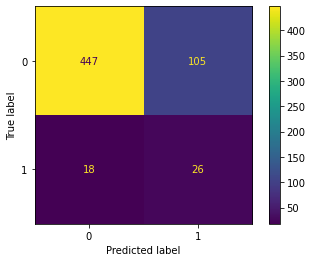

In [23]:
svm = SVC(class_weight={0: w0, 1: w1})
svm.fit(X_train_sc, y_train);

# Displays results of the model
model_results(svm, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, svm.predict(X_test_sc))

## Decision Tree Classifier

Mean Absolute Error: 0.09731543624161074
Root Mean Squared Error: 0.31195422138770734


,Precision,Recall,F1-score,Support
0,0.936396,0.960145,0.948122,552.000000
1,0.266667,0.181818,0.216216,44.000000
accuracy,0.902685,0.902685,0.902685,0.902685
macro avg,0.601531,0.570982,0.582169,596.000000
weighted avg,0.886953,0.902685,0.894088,596.000000


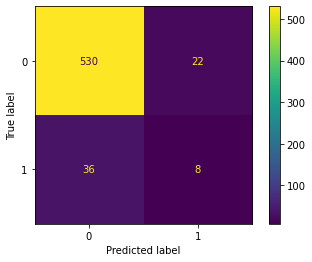

In [24]:
dtree = tree.DecisionTreeClassifier(class_weight={0: w0, 1: w1})
dtree.fit(X_train_sc, y_train);

# Displays results of the model
model_results(dtree, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, dtree.predict(X_test_sc))

## Random Forests

Mean Absolute Error: 0.11577181208053691
Root Mean Squared Error: 0.34025257101238326


,Precision,Recall,F1-score,Support
0,0.960000,0.913043,0.935933,552.000000
1,0.323944,0.522727,0.400000,44.000000
accuracy,0.884228,0.884228,0.884228,0.884228
macro avg,0.641972,0.717885,0.667967,596.000000
weighted avg,0.913043,0.884228,0.896368,596.000000


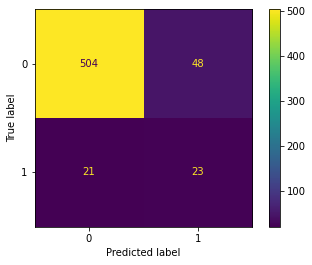

In [25]:
forest = RandomForestClassifier(class_weight={0: w0, 1: w1}, n_estimators=100, max_depth= 5)
forest.fit(X_train_sc, y_train);

# Displays results of the model
model_results(forest, X_test_sc, y_test)

# Returns Classification Report
get_classification_report(y_test, forest.predict(X_test_sc))

# Directly Comparing Classifiers

In [26]:
# Classifier Performance
def classifier_performance(X_train_sc, X_test_sc, y_test):
    accuracy_df = []
    recall_df = []
    precision_df = []
    
    # Instantiate classifier objects
    classifier_list = [lr, svm, dtree, forest]
    
    # Display accuracy dataframe
    for classifier in classifier_list:
        preds = classifier.predict(X_test_sc)
        accuracy = accuracy_score(y_test, preds)   
        precision = precision_score(y_test, preds)
        recall = recall_score(y_test, preds)
        rocauc = roc_auc_score(y_test, preds)
        accuracy_df.append(accuracy*100)
        precision_df.append(precision*100)
        recall_df.append(recall*100)
    accuracy_df = pd.DataFrame(accuracy_df)
    precision_df = pd.DataFrame(precision_df)
    recall_df = pd.DataFrame(recall_df)

    classifiers_key = ['Logistic Regression', 'Support Vector Machine', 
                       'Decision Tree', 'Random Forests']

    # Creating the datafram that displays results
    accuracy_df['Model']=classifiers_key
    precision_df['Model']=classifiers_key
    recall_df['Model']=classifiers_key
    accuracy_df.rename(columns={0: 'Accuracy'}, inplace=True)
    precision_df.rename(columns={0: 'Precision'}, inplace=True)
    recall_df.rename(columns={0: 'Recall'}, inplace=True)
    fin_metric_df = accuracy_df[['Model', 'Accuracy']]
    
    fin_metric_df = fin_metric_df.merge(precision_df,on='Model').merge(recall_df,on='Model')
    
    # Calculating F1 Score
    fin_metric_df['F1 Score'] = (2*((fin_metric_df['Precision']*fin_metric_df['Recall'])
                                  /(fin_metric_df['Precision']+fin_metric_df['Recall']))
                                )
    
    return fin_metric_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,73.657718,16.568047,63.636364,26.291080
1,Support Vector Machine,79.362416,19.847328,59.090909,29.714286
2,Decision Tree,90.268456,26.666667,18.181818,21.621622
3,Random Forests,88.422819,32.394366,52.272727,40.000000


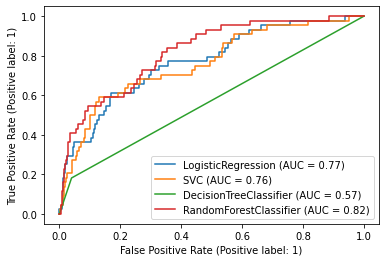

In [27]:
# Cmoparing ROC Curves
disp = plot_roc_curve(lr, X_test_sc, y_test)
plot_roc_curve(svm, X_test_sc, y_test, ax=disp.ax_);
plot_roc_curve(dtree, X_test_sc, y_test, ax=disp.ax_);
plot_roc_curve(forest, X_test_sc, y_test, ax=disp.ax_);

classifier_performance(X_train_sc, X_test_sc, y_test)

## Conclusions

Based on both the individual model outputs and the direct comparisons, our Random Forests had the best overall performance.

I conclude because this classifier has the highest ROC Curve & AUC Score

SVM has fewer false positives than Logistic Regression while maintaining a similar Trie Positive rate.

In this case, Decision Trees, despite accounting for class imbalances, seem to rely on automatically predicting for 0: songs not being in my playlist.

# Song Recommendation

For this analysis we will be comparing two different routes of content-based song recommendation.

One of which will use the cosine similarity from a matrix
& The other calculates the manhattan distance of each song from a matrix

I am choosing this approach because the goal is to recommend specific songs that are similar to my favorite binge-worthy tunes.

In [28]:
scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(df[feature_names])

# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)
# Create manhattan distance matrix based on given matrix
manhattan = manhattan_distances(normalized_df)

### Cosine Similarity Recommender

In [29]:
# Function to return Song Recommendations, can select number of entries
def cosine_recommendation(name, n_top):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    model_type = cosine
    # Get song indices
    index = indices[name]
    # Get list of songs for given songs
    score = list(enumerate(model_type[indices[name]]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    top_songs_index = [i[0] for i in similarity_score]
    # Top Recommended songs
    columns = ['name', 'artist']
    top_songs = df[columns].iloc[top_songs_index]
    # Dropping first row as it is the searched song
    top_songs = top_songs.tail(top_songs.shape[0] -1)
    
    # Calculating Recommendation Score
    y = similarity_score # y_true:  data captured for each song's features after formatting
    y_score = score # y_score: data's original score given by the model type
    print(f'Recommender Score: {ndcg_score(y, y_score)*100}%')  
    
    return top_songs[:n_top]

### Manhattan Distance Recommender

In [30]:
# Function to return Song Recommendations, can select number of entries
def manhattan_recommendation(name, n_top):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    model_type = manhattan
    # Get song indices
    index = indices[name]
    # Get list of songs for given songs
    score = list(enumerate(model_type[indices[name]]))
    # Sort songs with closest distance
    distance_score = sorted(score,key = lambda x:x[1],reverse = False)
    top_songs_index = [i[0] for i in distance_score]
    # Top recommended songs
    columns = ['name', 'artist']
    top_songs = df[columns].iloc[top_songs_index]
    # Dropping first row as it is the searched song
    top_songs = top_songs.tail(top_songs.shape[0] -1)

    # Calculating Recommendation Score
    y = distance_score #
    y_score = score
    print(f'Recommender Score: {ndcg_score(y, y_score)*100}%')
    
    return top_songs[:n_top]

### Comparing Recommenders

In [31]:
cosine_recommendation('5:32pm',5)

Recommender Score: 99.98150439207147%


,name,artist
2688,Tessin,lorleaf
2810,Hit Snooze,High John
1500,Kalmar,Guzimi
1599,Nest,don C
1192,Moving Day,Paul Lovett


In [32]:
manhattan_recommendation('5:32pm',5)

Recommender Score: 99.93146742773692%


,name,artist
2688,Tessin,lorleaf
1569,Slanger,pesto tree
2810,Hit Snooze,High John
798,Retro Jam,Blu Tone
150,Fly Away,Altair Blake


In [33]:
cosine_recommendation('Caliber',5)

Recommender Score: 99.98147683246941%


,name,artist
3647,Liza waited,Sail & Weep
2643,Sleepwalking,Josa
3744,florida keys,Kolorama
822,Crescent,URCHN
1155,Algud,Konteks


In [34]:
manhattan_recommendation('Caliber',5)

Recommender Score: 99.9535705238757%


,name,artist
3647,Liza waited,Sail & Weep
3744,florida keys,Kolorama
1155,Algud,Konteks
2643,Sleepwalking,Josa
822,Crescent,URCHN


In [35]:
cosine_recommendation('Space Cowboy',5)

Recommender Score: 99.98147794610426%


,name,artist
115,Samui Sunrise,Saib
573,Keep On,Seb Wildblood
2594,Sweet Sunset,Iassu
851,va y viene,Jiony
3606,As a friend,Boho Scottish


In [36]:
manhattan_recommendation('Space Cowboy',5)

Recommender Score: 99.95326372863843%


,name,artist
115,Samui Sunrise,Saib
1109,Afternoon Break,Raouf Beats
851,va y viene,Jiony
573,Keep On,Seb Wildblood
2164,Out All Night,Ray Ben Rue


In [37]:
cosine_recommendation('Sugar - Original Mix',5)

Recommender Score: 99.9814827548703%


,name,artist
117,When You Call Me,STR4TA
187,How Long Have You Been Away?,kryptogram
2282,THE BOTTOM,MICHELLE
149,Lost Myself,Eric Krasno
3185,ketamine,siouxxie sixxsta


In [38]:
manhattan_recommendation('Sugar - Original Mix',5)

Recommender Score: 99.94807886806895%


,name,artist
117,When You Call Me,STR4TA
2282,THE BOTTOM,MICHELLE
187,How Long Have You Been Away?,kryptogram
3185,ketamine,siouxxie sixxsta
149,Lost Myself,Eric Krasno


In [39]:
cosine_recommendation('That\'s Just Me',5)

Recommender Score: 99.98156094192557%


,name,artist
2748,Segundi,Fuzl
1582,Umami,Lito Akari
3699,"Well, I Guess It Has Been a Vibe",PETITE FESSE
253,runnersz,Joy Orbison
2106,Bless U,Twit One


In [40]:
manhattan_recommendation('That\'s Just Me',5)

Recommender Score: 99.94579087669796%


,name,artist
2106,Bless U,Twit One
2748,Segundi,Fuzl
3699,"Well, I Guess It Has Been a Vibe",PETITE FESSE
253,runnersz,Joy Orbison
991,Cloudscape,SōNE


In [41]:
cosine_recommendation('Green Lights',5)

Recommender Score: 99.98159280612485%


,name,artist
787,Mango Bathing,Nick Mosh
3990,Rotterdam Rita,Fletcher Reed
786,Light-Hearted Lady,High John
250,Night Owl,Cihangir Aslan
750,Hour and half,Lunatic Sad


In [42]:
manhattan_recommendation('Green Lights',5)

Recommender Score: 99.93266310852351%


,name,artist
786,Light-Hearted Lady,High John
3990,Rotterdam Rita,Fletcher Reed
787,Mango Bathing,Nick Mosh
250,Night Owl,Cihangir Aslan
99,Fireworks,Nymano


In [43]:
cosine_recommendation('Don\'t Give Up',5)

Recommender Score: 99.98148149621754%


,name,artist
164,Say Yes,C4C
3824,Slow Gaze,SASAF
45,Gardens,Various Artists
1071,olvido,tres islas
3159,Asdikte Akal - Yugen Blakrok Remix,Mdou Moctar


In [44]:
manhattan_recommendation('Don\'t Give Up',5)

Recommender Score: 99.95466100735445%


,name,artist
164,Say Yes,C4C
45,Gardens,Various Artists
1071,olvido,tres islas
3824,Slow Gaze,SASAF
1013,Before the Sun,Dr. Dundiff


# Conclusions
Though these two different recommenders return different results, there appears to be an agreement with some songs in their results.

Due to the songs having similar features throughout all variables, tracks that appear in both recommenders must be reliable matches to the music searched and might be a likely lead to be added to my playlist.

There are also some instances of recommended songs that are already present in my playlist. But that can be attributed to them being present in this dataset

My takeaway is that the standard Cosine Similarity Recommender is slightly better, beecause it has an overall more consistent performance of 99.98% with the nDCG metric. Ranking each entry in a more proper order